# Data Preparation

This notebook prepares a clean daily time series dataset for forecasting.

Key steps:
- Generate a synthetic daily sales dataset
- Capture trend, weekly seasonality, and yearly seasonality
- Split the data into training and testing sets

The prepared data will be used for forecasting with NeuralProphet and SARIMAX models.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
dates = pd.date_range(start="2018-01-01", end="2021-12-31", freq="D")
n = len(dates)

trend = np.linspace(50, 200, n)
weekly = 10 * np.sin(2 * np.pi * dates.dayofweek / 7)
yearly = 20 * np.sin(2 * np.pi * dates.dayofyear / 365)
noise = np.random.normal(0, 5, n)

sales = trend + weekly + yearly + noise

df = pd.DataFrame({
    "ds": dates,
    "y": sales
})

df.head()

,ds,y
0,2018-01-01,52.827838
1,2018-01-02,57.918165
2,2018-01-03,64.225595
3,2018-01-04,63.638254
4,2018-01-05,46.620651


In [3]:
dates = pd.date_range(start="2018-01-01", end="2021-12-31", freq="D")
n = len(dates)

trend = np.linspace(50, 200, n)
weekly = 10 * np.sin(2 * np.pi * dates.dayofweek / 7)
yearly = 20 * np.sin(2 * np.pi * dates.dayofyear / 365)
noise = np.random.normal(0, 5, n)

sales = trend + weekly + yearly + noise

df = pd.DataFrame({
    "ds": dates,
    "y": sales
})

df.head()

,ds,y
0,2018-01-01,44.222776
1,2018-01-02,57.564370
2,2018-01-03,56.734550
3,2018-01-04,53.120488
4,2018-01-05,50.734310


In [4]:
os.makedirs("../data", exist_ok=True)

df.to_csv("../data/full_data.csv", index=False)

train_df = df.iloc[:-365]
test_df = df.iloc[-365:]

train_df.to_csv("../data/train_data.csv", index=False)
test_df.to_csv("../data/test_data.csv", index=False)

len(train_df), len(test_df)


(1096, 365)

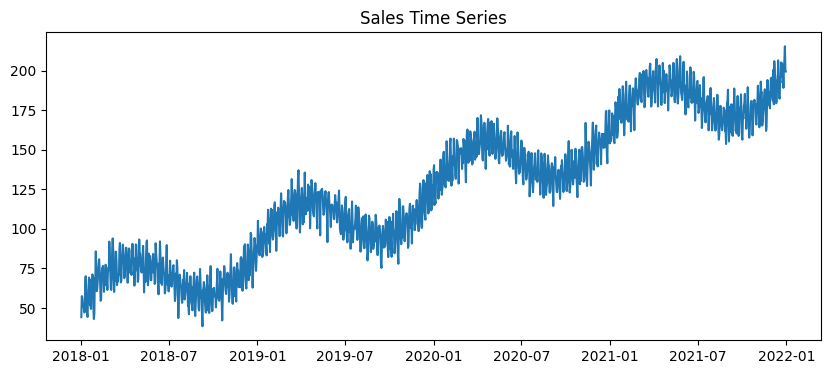

In [5]:
plt.figure(figsize=(10,4))
plt.plot(df["ds"], df["y"])
plt.title("Sales Time Series")
plt.show()

In [ ]:
df.to_csv("../data/full_data.csv", index=False)
train_df.to_csv("../data/train_data.csv", index=False)
test_df.to_csv("../data/test_data.csv", index=False)

print("Data saved successfully")


Data preparation completed.
